In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from math import sin,cos,pi

In [2]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
from random import *

In [3]:
is_local = False
if (is_local):
        print("fail")
else:
        PATH = "../00_ML_data/01_Accel_Data_m_s/"

In [4]:
file_len = len(os.listdir(PATH))
f"파일 갯수는 {file_len!r} 입니다 "

'파일 갯수는 6 입니다 '

In [5]:
data_list = os.listdir(PATH)
data_list

['Accel_2012',
 'Accel_2013',
 'Accel_2014',
 'Accel_2015',
 'Accel_2017',
 'Accel_2018']

In [6]:
dataNumber = [] 
for i in range(0,6):
    dataList = os.listdir(PATH + data_list[i])
    dataNumber.append(len(dataList))
                    
print(sum(dataNumber))

21514


In [34]:
path = '../00_ML_data/01_Accel_Data_m_s/Accel_2012/3332325_0.dat'
data_df = pd.read_csv(path, names=['time', '_x', '_y', '_z'],header=None, error_bad_lines=False )
signals = data_df.copy()
signals = signals.drop('time',axis=1)
fs = 200
x = signal.resample(signals['_z'][0:72000],72000)

In [35]:
type(x)

numpy.ndarray

In [36]:
# print(len(x))
print(signals['_x'][0:7200])

0      -3.197749e-08
1       2.591352e-08
2      -2.678963e-09
3       5.040576e-09
4      -7.528876e-09
            ...     
7195    8.888112e-08
7196   -3.280977e-08
7197   -1.460355e-08
7198    6.170732e-08
7199   -3.664908e-08
Name: _x, Length: 7200, dtype: float64


In [40]:
f, t, Sxx = signal.spectrogram(x, fs, 
                               nperseg = 256,
                              noverlap = 12,
                              nfft = 256)
Sxx.shape

(129, 295)

In [45]:
#x = x * pow(10,5) * random()
x = [0.01 * i for i in range(0,7200)]
x = np.array([sin(j*pi)*random()*pow(10,9) for j in x])
fs = 200

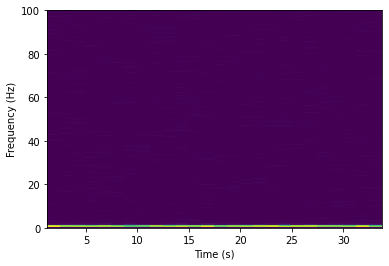

In [47]:
f, t, Sxx = signal.spectrogram(x, fs, 
                               nperseg = 500,
                              noverlap =250)
plt.pcolormesh(t, f, Sxx)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show
plt.savefig('example.png')

In [12]:
Sxx.shape

(130, 71743)

# STFT 데이터 분석

In [13]:
# for i in range(0,6):
#     dataList = os.listdir(PATH + data_list[i])
#     for j in range(0,len(dataList)):

In [14]:
dataName = []
dataLength = []
TimeFrequencyArray = []

In [15]:
for i in range(0,6):
    dataList = os.listdir(PATH + data_list[i])
    #print(len(dataList))
    for j in range(0,len(dataList)):
    #for j in range(0,len(dataList)):
        path = PATH + data_list[i] + "/" + dataList[j]
        #print(path)
        data_df = pd.read_csv(path, names=['time', '_x', '_y', '_z'],header=None, error_bad_lines=False )
        
        signals = data_df.copy()
        signals = signals.drop('time',axis=1)
        #print(signals.head(5))
        
        fs = 200
        #x =  signals['_x'][0:7200]
        x = signal.resample(signals['_x'][0:7200], 72000)
        #print(len(x))
        #x = x * pow(10,10) # 일정값 곱하기 
        
        #len_x = len(signals['_x'])
        f, t, Sxx = signal.spectrogram(x, fs, 
                               nperseg = 64,
                              noverlap = 32)
        #print(Sxx.shape)
        FrequencyArray = Sxx[:,0]
        for k in range(1, Sxx.shape[1]):
            FrequencyArray += Sxx[:,k]  
        
#         FrequencyArray = FrequencyArray.reshape(-1,1)
#         scaler.fit(FrequencyArray)
#         FrequencyArray = scaler.transform(FrequencyArray)
   

        TimeArray = Sxx[0]
        for k in range(1, Sxx.shape[0]):
            TimeArray += Sxx[k]
        
#         TimeArray = TimeArray.reshape(-1,1)
#         scaler.fit(TimeArray)
#         TimeArray = scaler.transform(TimeArray)
        
        
        #TFA = np.concatenate((FrequencyArray,TimeArray))
        TFA = np.array(FrequencyArray)
        
        
        dataName.append(dataList[j])
        dataLength.append(len(data_df['_x']))
        TimeFrequencyArray.append(TFA)
       

In [16]:
# f, t, Sxx = signal.spectrogram(x, fs, 
#                                nperseg = 256,
#                               noverlap = 25)

In [17]:
len(x)

72000

In [18]:
Sxx.shape

(33, 2249)

<function matplotlib.pyplot.show(*args, **kw)>

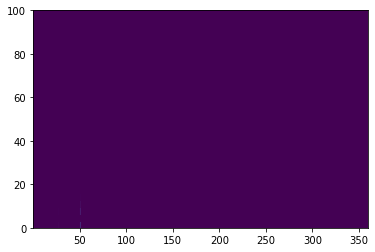

In [19]:
plt.pcolormesh(t, f, Sxx)
plt.show

In [20]:
#print(dataName)
# print(dataLength)
#print(TimeFrequencyArray)

In [21]:
NPTimeFrequencyArray= np.array(TimeFrequencyArray)
NPTimeFrequencyArray

array([[1.73960725e-12, 7.18531384e-13, 6.43547318e-13, ...,
        1.93146169e-21, 2.61585816e-21, 1.26605709e-21],
       [1.26240380e-12, 5.19280990e-13, 4.68037580e-13, ...,
        1.39158065e-21, 1.90733714e-21, 9.24412579e-22],
       [7.87787508e-13, 3.28364146e-13, 2.91089797e-13, ...,
        8.70779247e-22, 1.20010175e-21, 5.77735672e-22],
       ...,
       [6.64063666e-16, 7.89302535e-17, 4.07224745e-16, ...,
        3.55873454e-25, 6.91957412e-25, 3.50335023e-25],
       [7.07986288e-16, 7.41857253e-17, 4.40062494e-16, ...,
        3.67567403e-25, 6.69293548e-25, 3.13465893e-25],
       [8.23117808e-16, 7.07255855e-17, 5.24253880e-16, ...,
        3.96124102e-25, 7.10229574e-25, 3.15786180e-25]])

In [22]:
NPTimeFrequencyArray.shape

(21514, 33)

# dataFrame 넣기 

In [23]:
df = pd.DataFrame(NPTimeFrequencyArray)
df.shape

(21514, 33)

In [24]:
len(dataName)

21514

In [25]:
#df['dataName'] = [name.replace('.dat','') for name in dataName]
df['dataLength'] = dataLength

In [26]:
print(df.shape)
df.head(5)

(21514, 34)


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,dataLength
0,1.739607e-12,7.185314e-13,6.435473e-13,3.253486e-13,2.454688e-14,7.367878e-15,3.197389e-15,1.684820e-15,9.310477e-16,4.807226e-16,...,1.621931e-19,1.348250e-19,9.794237e-20,5.733978e-20,2.236358e-20,4.719832e-21,1.931462e-21,2.615858e-21,1.266057e-21,8598
1,1.262404e-12,5.192810e-13,4.680376e-13,2.373329e-13,1.785354e-14,5.345506e-15,2.312667e-15,1.215814e-15,6.716926e-16,3.474705e-16,...,1.159722e-19,9.664079e-20,7.065513e-20,4.172243e-20,1.637820e-20,3.443436e-21,1.391581e-21,1.907337e-21,9.244126e-22,8598
2,7.877875e-13,3.283641e-13,2.910898e-13,1.449593e-13,1.102823e-14,3.331622e-15,1.445861e-15,7.561841e-16,4.141714e-16,2.129480e-16,...,7.230000e-20,5.965755e-20,4.337624e-20,2.576480e-20,1.021168e-20,2.149705e-21,8.707792e-22,1.200102e-21,5.777357e-22,8598
3,4.429314e-13,1.969369e-13,1.601170e-13,7.297938e-14,5.899783e-15,1.865843e-15,8.292316e-16,4.290885e-16,2.274868e-16,1.132005e-16,...,4.287835e-20,3.378486e-20,2.341505e-20,1.374272e-20,5.516322e-21,1.185292e-21,5.086058e-22,6.836551e-22,3.189182e-22,8598
4,3.202395e-13,1.602150e-13,1.102132e-13,4.068002e-14,3.842361e-15,1.340925e-15,6.280040e-16,3.221720e-16,1.616607e-16,7.495525e-17,...,3.559080e-20,2.595529e-20,1.612015e-20,8.877512e-21,3.550248e-21,8.086120e-22,4.021044e-22,4.963788e-22,2.173100e-22,8598


# 데이터 뽑기 

In [27]:
df.to_csv('NPFrequencyArray.csv',index=False)

In [28]:
ydata = pd.read_csv('./02_Code_ver2/01_y_data_total.csv')
#ydata = ydata[:180]
ydata

,fileName,path1_membrane_SINT,path1_bending_SINT,path2_membrane_SINT,path2_bending_SINT,path3_membrane_SINT,path3_bending_SINT,path4_membrane_SINT,path4_bending_SINT,path5_membrane_SINT,...,path10_membrane_SINT,path10_bending_SINT,path11_membrane_SINT,path11_bending_SINT,path12_membrane_SINT,path12_bending_SINT,path13_membrane_SINT,path13_bending_SINT,path14_membrane_SINT,path14_bending_SINT
0,3332325_0,4.210000e-06,1.550000e-06,6.250000e-06,6.960000e-07,3.980000e-06,1.540000e-06,1.040000e-06,1.240000e-07,0.000033,...,1.260000e-05,7.920000e-07,6.460000e-06,2.260000e-06,5.510000e-06,4.810000e-06,1.440000e-05,1.610000e-05,1.090000e-05,1.070000e-05
1,3332325_15,3.800000e-06,1.410000e-06,5.590000e-06,6.300000e-07,3.570000e-06,1.390000e-06,9.530000e-07,1.110000e-07,0.000029,...,1.120000e-05,7.030000e-07,5.780000e-06,2.030000e-06,4.960000e-06,4.330000e-06,1.300000e-05,1.440000e-05,9.850000e-06,9.630000e-06
2,3332325_30,3.280000e-06,1.220000e-06,4.830000e-06,5.390000e-07,3.080000e-06,1.190000e-06,8.230000e-07,9.400000e-08,0.000025,...,9.610000e-06,5.930000e-07,4.970000e-06,1.740000e-06,4.280000e-06,3.740000e-06,1.120000e-05,1.250000e-05,8.500000e-06,8.330000e-06
3,3332325_45,2.550000e-06,9.540000e-07,3.780000e-06,4.230000e-07,2.410000e-06,9.320000e-07,6.430000e-07,7.390000e-08,0.000020,...,7.490000e-06,4.550000e-07,3.880000e-06,1.360000e-06,3.330000e-06,2.910000e-06,8.730000e-06,9.720000e-06,6.630000e-06,6.470000e-06
4,3332325_60,2.180000e-06,8.090000e-07,3.220000e-06,3.550000e-07,2.050000e-06,7.890000e-07,5.430000e-07,6.220000e-08,0.000017,...,6.410000e-06,3.950000e-07,3.310000e-06,1.160000e-06,2.850000e-06,2.490000e-06,7.460000e-06,8.310000e-06,5.660000e-06,5.550000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21509,10723805_30_sigma_1,1.850000e-07,6.800000e-08,2.890000e-07,2.860000e-08,1.780000e-07,6.200000e-08,4.250000e-08,4.920000e-09,0.000002,...,5.750000e-07,3.050000e-08,2.980000e-07,1.050000e-07,2.360000e-07,1.910000e-07,6.190000e-07,6.730000e-07,4.670000e-07,4.130000e-07
21510,10723805_45_sigma_1,1.500000e-07,5.490000e-08,2.340000e-07,2.310000e-08,1.440000e-07,5.010000e-08,3.430000e-08,3.980000e-09,0.000001,...,4.680000e-07,2.480000e-08,2.420000e-07,8.470000e-08,1.910000e-07,1.550000e-07,5.010000e-07,5.450000e-07,3.780000e-07,3.350000e-07
21511,10723805_60_sigma_1,1.650000e-07,5.960000e-08,2.550000e-07,2.480000e-08,1.570000e-07,5.320000e-08,3.640000e-08,4.240000e-09,0.000001,...,5.230000e-07,2.740000e-08,2.680000e-07,9.390000e-08,2.050000e-07,1.590000e-07,5.360000e-07,5.760000e-07,4.060000e-07,3.390000e-07
21512,10723805_75_sigma_1,1.950000e-07,7.100000e-08,3.040000e-07,2.990000e-08,1.870000e-07,6.380000e-08,4.360000e-08,5.120000e-09,0.000002,...,6.190000e-07,3.230000e-08,3.180000e-07,1.120000e-07,2.440000e-07,1.910000e-07,6.400000e-07,6.890000e-07,4.850000e-07,4.070000e-07


In [29]:
# frames = [df, ydata]

In [30]:
# dfMerge = pd.concat(frames, axis = 1)
# dfMerge

In [31]:
# dfMerge.drop(['fileName','dataName'],axis=1)

In [32]:
for i in range(1,15):
    frames = [df, ydata['path'+str(i)+'_membrane_SINT'],ydata['path'+str(i)+'_bending_SINT']]
    test = pd.concat(frames, axis = 1)
    test.to_csv('Frequency_'+'path'+str(i)+'Data.csv',index=False)
    print(test.head(5))

              0             1             2             3             4  \
0  1.739607e-12  7.185314e-13  6.435473e-13  3.253486e-13  2.454688e-14   
1  1.262404e-12  5.192810e-13  4.680376e-13  2.373329e-13  1.785354e-14   
2  7.877875e-13  3.283641e-13  2.910898e-13  1.449593e-13  1.102823e-14   
3  4.429314e-13  1.969369e-13  1.601170e-13  7.297938e-14  5.899783e-15   
4  3.202395e-13  1.602150e-13  1.102132e-13  4.068002e-14  3.842361e-15   

              5             6             7             8             9  ...  \
0  7.367878e-15  3.197389e-15  1.684820e-15  9.310477e-16  4.807226e-16  ...   
1  5.345506e-15  2.312667e-15  1.215814e-15  6.716926e-16  3.474705e-16  ...   
2  3.331622e-15  1.445861e-15  7.561841e-16  4.141714e-16  2.129480e-16  ...   
3  1.865843e-15  8.292316e-16  4.290885e-16  2.274868e-16  1.132005e-16  ...   
4  1.340925e-15  6.280040e-16  3.221720e-16  1.616607e-16  7.495525e-17  ...   

             26            27            28            29           

              0             1             2             3             4  \
0  1.739607e-12  7.185314e-13  6.435473e-13  3.253486e-13  2.454688e-14   
1  1.262404e-12  5.192810e-13  4.680376e-13  2.373329e-13  1.785354e-14   
2  7.877875e-13  3.283641e-13  2.910898e-13  1.449593e-13  1.102823e-14   
3  4.429314e-13  1.969369e-13  1.601170e-13  7.297938e-14  5.899783e-15   
4  3.202395e-13  1.602150e-13  1.102132e-13  4.068002e-14  3.842361e-15   

              5             6             7             8             9  ...  \
0  7.367878e-15  3.197389e-15  1.684820e-15  9.310477e-16  4.807226e-16  ...   
1  5.345506e-15  2.312667e-15  1.215814e-15  6.716926e-16  3.474705e-16  ...   
2  3.331622e-15  1.445861e-15  7.561841e-16  4.141714e-16  2.129480e-16  ...   
3  1.865843e-15  8.292316e-16  4.290885e-16  2.274868e-16  1.132005e-16  ...   
4  1.340925e-15  6.280040e-16  3.221720e-16  1.616607e-16  7.495525e-17  ...   

             26            27            28            29           

              0             1             2             3             4  \
0  1.739607e-12  7.185314e-13  6.435473e-13  3.253486e-13  2.454688e-14   
1  1.262404e-12  5.192810e-13  4.680376e-13  2.373329e-13  1.785354e-14   
2  7.877875e-13  3.283641e-13  2.910898e-13  1.449593e-13  1.102823e-14   
3  4.429314e-13  1.969369e-13  1.601170e-13  7.297938e-14  5.899783e-15   
4  3.202395e-13  1.602150e-13  1.102132e-13  4.068002e-14  3.842361e-15   

              5             6             7             8             9  ...  \
0  7.367878e-15  3.197389e-15  1.684820e-15  9.310477e-16  4.807226e-16  ...   
1  5.345506e-15  2.312667e-15  1.215814e-15  6.716926e-16  3.474705e-16  ...   
2  3.331622e-15  1.445861e-15  7.561841e-16  4.141714e-16  2.129480e-16  ...   
3  1.865843e-15  8.292316e-16  4.290885e-16  2.274868e-16  1.132005e-16  ...   
4  1.340925e-15  6.280040e-16  3.221720e-16  1.616607e-16  7.495525e-17  ...   

             26            27            28            29           